In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd
from scipy.stats import linregress

# PLOT

In [2]:
# Load the CSV file
file_path = 'Resources/average_air_quality_health.csv'
data = pd.read_csv(file_path)

# Drop the 'City' column
data = data.drop(columns=['City'])

# Group by 'Country' and calculate the mean for all numeric columns
country_aggregated = data.groupby('Country').sum().reset_index()

# Round all numeric columns to 0 decimal places
country_aggregated = country_aggregated.round(0)

# Display the result
country_aggregated.head()

df_ranked = country_aggregated.sort_values(by='MortalityRate_per_100k', ascending=False)
top_10_country_ranking = df_ranked.head(10)

## Country combined vs Mortality Rate

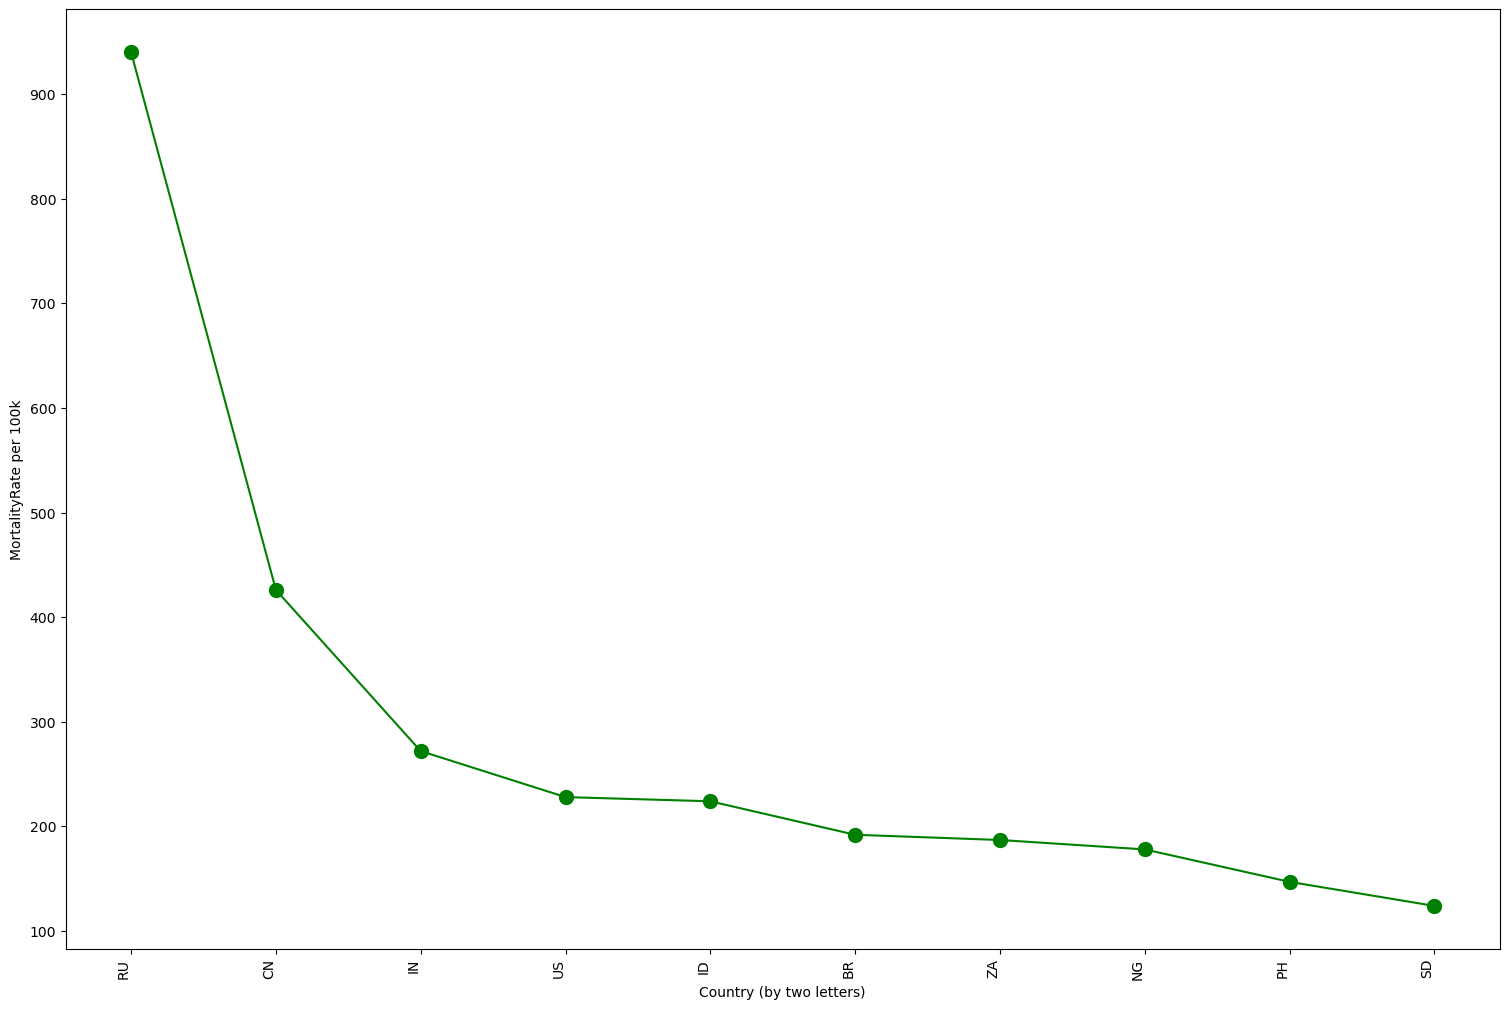

In [3]:
x_axis = top_10_country_ranking['Country']
y_axis = top_10_country_ranking['MortalityRate_per_100k']
plt.figure(figsize=(15, 10)) 
plt.plot(x_axis,y_axis, color='green', marker="o", markersize=10)
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()
plt.xlabel("Country (by two letters)")
plt.ylabel("MortalityRate per 100k")
plt.show() 

In [4]:
top_10 = df_ranked.head(10)
bot_8 = df_ranked.tail(8)
combined_df = pd.concat([top_10, bot_8])

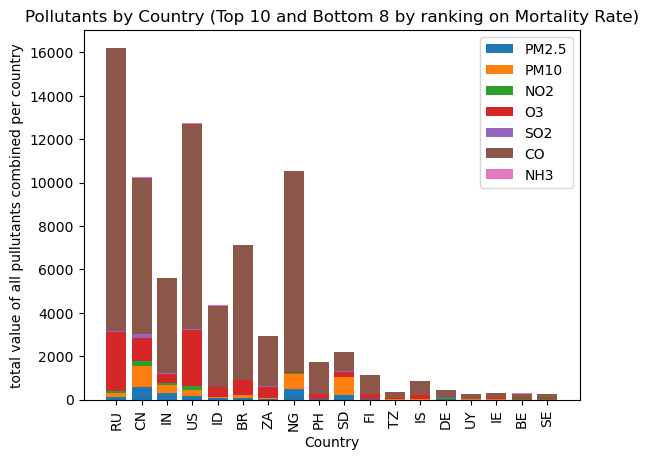

In [5]:
#comparing Top 10 most mortality rate country to 
plt.bar(combined_df['Country'], combined_df['PM2.5'], label='PM2.5')
plt.bar(combined_df['Country'], combined_df['PM10'], bottom=combined_df['PM2.5'], label='PM10')
plt.bar(combined_df['Country'], combined_df['NO2'], bottom=combined_df['PM2.5'] + combined_df['PM10'], label='NO2')
plt.bar(combined_df['Country'], combined_df['O3'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'], label='O3')
plt.bar(combined_df['Country'], combined_df['SO2'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'], label='SO2')
plt.bar(combined_df['Country'], combined_df['CO'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'] + combined_df['SO2'], label='CO')
plt.bar(combined_df['Country'], combined_df['NH3'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'] + combined_df['SO2']  + combined_df['CO'], label='NH3')

#labels
plt.xlabel('Country')
plt.ylabel('total value of all pullutants combined per country')
plt.title('Pollutants by Country (Top 10 and Bottom 8 by ranking on Mortality Rate)')
plt.xticks(rotation=90)
plt.legend()

plt.show()

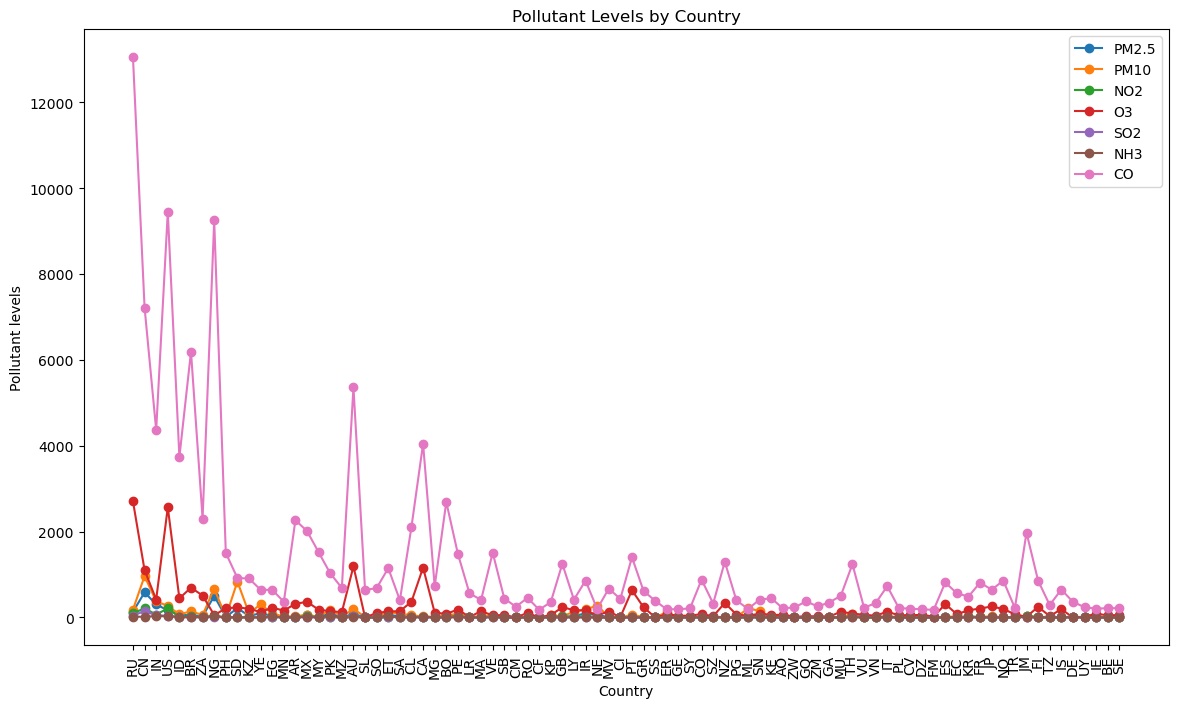

In [6]:
# Different pollutant levels spread through Countries

plt.figure(figsize=(14, 8)) 

plt.plot(df_ranked['Country'], df_ranked['PM2.5'], label='PM2.5', marker='o')
plt.plot(df_ranked['Country'], df_ranked['PM10'], label='PM10', marker='o')
plt.plot(df_ranked['Country'], df_ranked['NO2'], label='NO2', marker='o')
plt.plot(df_ranked['Country'], df_ranked['O3'], label='O3', marker='o')
plt.plot(df_ranked['Country'], df_ranked['SO2'], label='SO2', marker='o')
plt.plot(df_ranked['Country'], df_ranked['NH3'], label='NH3', marker='o')
plt.plot(df_ranked['Country'], df_ranked['CO'], label='CO', marker='o')


plt.xlabel('Country')
plt.ylabel('Pollutant levels')
plt.title('Pollutant Levels by Country')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [7]:
# try to get the table with Country and MortalityRate only for Powerpoint
top_10_10_countrywithMortality =  top_10_country_ranking.drop(columns=['PM2.5','PM10','NO2','O3','SO2',
                                                          'CO','NH3'])
top_10_10_countrywithMortality

,Country,MortalityRate_per_100k
63,RU,940.0
11,CN,426.0
31,IN,272.0
77,US,228.0
29,ID,224.0
5,BR,192.0
83,ZA,187.0
53,NG,178.0
58,PH,147.0
66,SD,124.0


## NO2 vs Mortality Rate

In [8]:
country_x_aixs = df_ranked['MortalityRate_per_100k']
PM10_y_axis = df_ranked['NO2']

The r-squared is: 0.38239921654567555


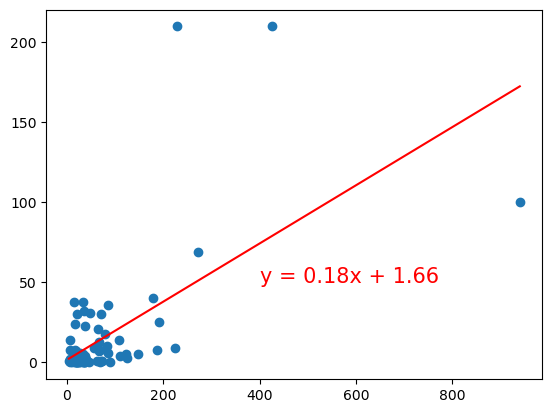

In [9]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(country_x_aixs, PM10_y_axis)
regress_values = country_x_aixs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(country_x_aixs, PM10_y_axis)
plt.plot(country_x_aixs,regress_values,"r-")
plt.annotate(line_eq,(400,50),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [10]:
#The R-squared value of 0.283 means that 28.3% of the variation in mortality rate can be explained by PM2.5 levels. 
#While PM2.5 has some impact, other factors likely account for the remaining 71.7% of the variation.

# DATA exploration

In [11]:
# Load the CSV file
file_path = 'Resources/average_air_quality_health.csv'
data = pd.read_csv(file_path)

## PM2.5

The r-squared is: 0.1210517461434011


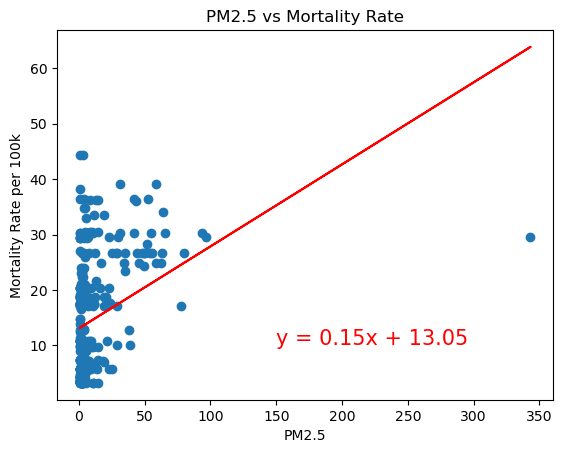

In [12]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_PM25 = data['PM2.5']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_PM25, y_axis_data)
regress_values = x_axis_data_PM25 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis_data_PM25, y_axis_data)
plt.title('PM2.5 vs Mortality Rate')
plt.xlabel('PM2.5')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_PM25,regress_values,"r-")
plt.annotate(line_eq,(150,10),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [13]:
##conclusion
# The R-squared value of 0.121 means that only 12.1% of the variation in mortality rate can be explained by PM2.5 levels. 
# This indicates a weak linear relationship between PM2.5 levels and mortality rates, 
# with most of the variation (87.9%) likely due to other factors not captured by this model.

## PM10

The r-squared is: 0.14026473720940433


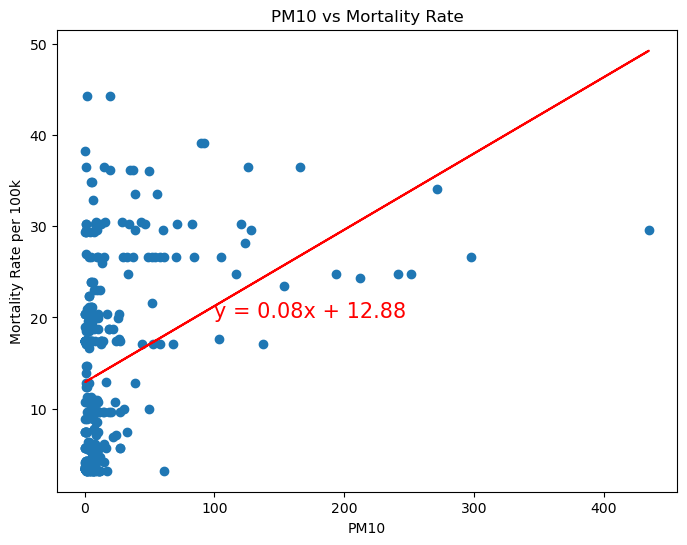

In [14]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_PM10 = data['PM10']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_PM10, y_axis_data)
regress_values = x_axis_data_PM10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_PM10, y_axis_data)
plt.title('PM10 vs Mortality Rate')
plt.xlabel('PM10')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_PM10, regress_values,"r-")
plt.annotate(line_eq,(100,20),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [15]:
##conclusion:
# The R-squared value of 0.140 indicates that about 14.0% of the variation 
# in mortality rates can be explained by PM10 levels.
# This suggests a weak linear relationship, with most of the variation (86.0%) likely influenced by 
# other factors not accounted for in the model.

## NO2

The r-squared is: 0.008193559037854539


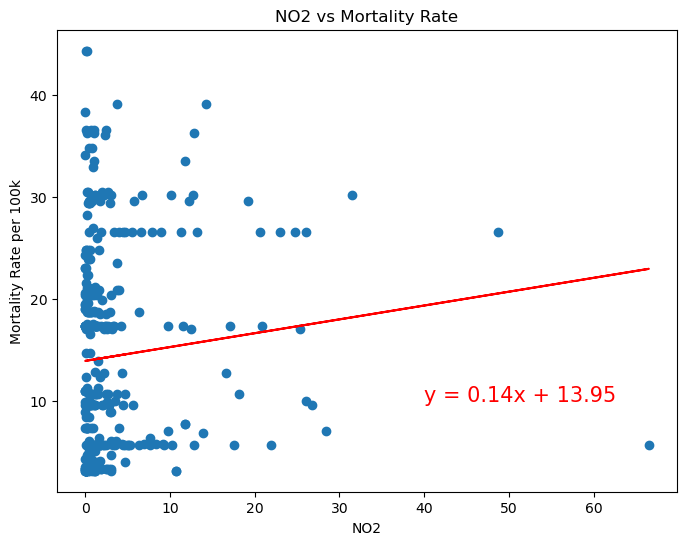

In [16]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_NO2 = data['NO2']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_NO2, y_axis_data)
regress_values = x_axis_data_NO2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_NO2, y_axis_data)
plt.title('NO2 vs Mortality Rate')
plt.xlabel('NO2')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_NO2, regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.show()

## CO

The r-squared is: 0.040201186162711816


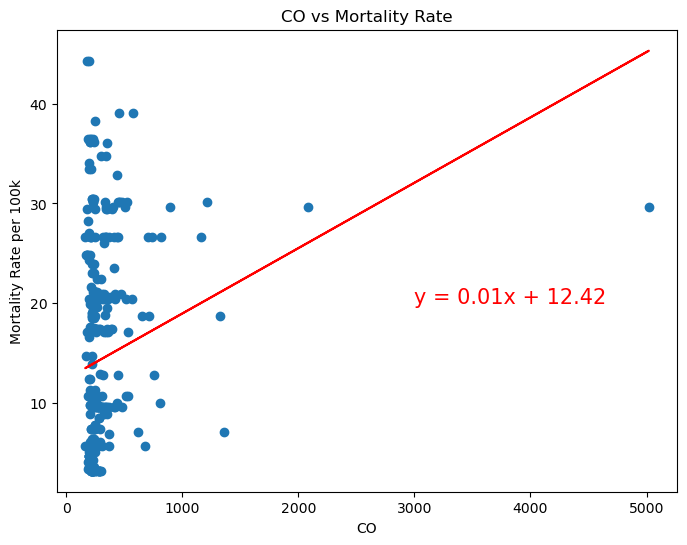

In [17]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_CO = data['CO']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_CO, y_axis_data)
regress_values = x_axis_data_CO * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_CO, y_axis_data)
plt.title('CO vs Mortality Rate')
plt.xlabel('CO')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_CO, regress_values,"r-")
plt.annotate(line_eq,(3000,20),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [18]:
data

,City,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
0,abbeville,FR,4.7,8.8,4.7,36.8,0.8,210.3,1.3,4.1
1,acarau,BR,2.1,9.6,0.2,52.2,0.1,353.8,0.1,9.6
2,agbor,NG,29.9,39.2,5.7,2.5,0.4,894.6,0.6,29.6
3,al jawf,SA,11.1,39.2,1.0,101.6,1.7,193.6,0.5,33.5
4,al qusayr,SY,7.9,10.0,4.7,40.8,2.5,210.3,2.7,26.6
...,...,...,...,...,...,...,...,...,...,...
393,zaragoza,ES,0.5,0.7,0.9,67.2,0.1,203.6,1.0,4.2
394,zavoronezhskoye,RU,1.0,1.1,0.7,75.8,0.1,227.0,0.1,17.4
395,zhangatas,KZ,4.6,15.4,2.0,54.4,3.7,230.3,0.1,30.5
396,zhangjiakou,CN,3.3,9.9,1.9,62.2,0.9,200.3,3.4,26.6


## O3

The r-squared is: 0.02299068041054326


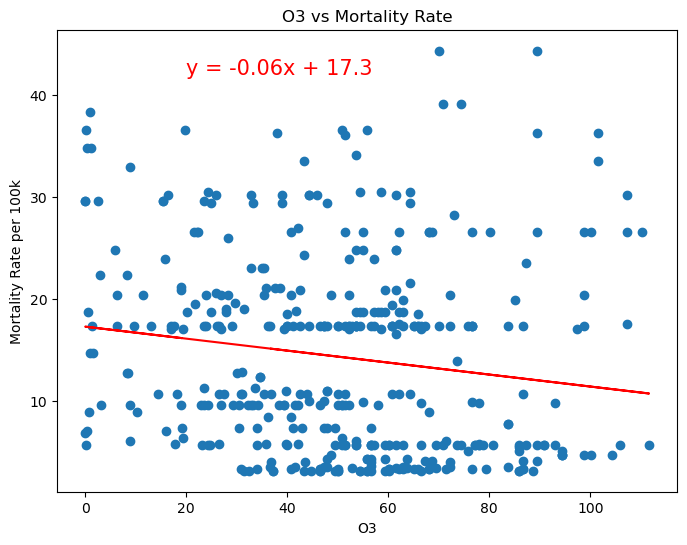

In [19]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_O3 = data['O3']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_O3, y_axis_data)
regress_values = x_axis_data_O3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_O3, y_axis_data)
plt.title('O3 vs Mortality Rate')
plt.xlabel('O3')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_O3, regress_values,"r-")
plt.annotate(line_eq,(20,42),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.show()

## SO2

The r-squared is: 0.033293329745142354


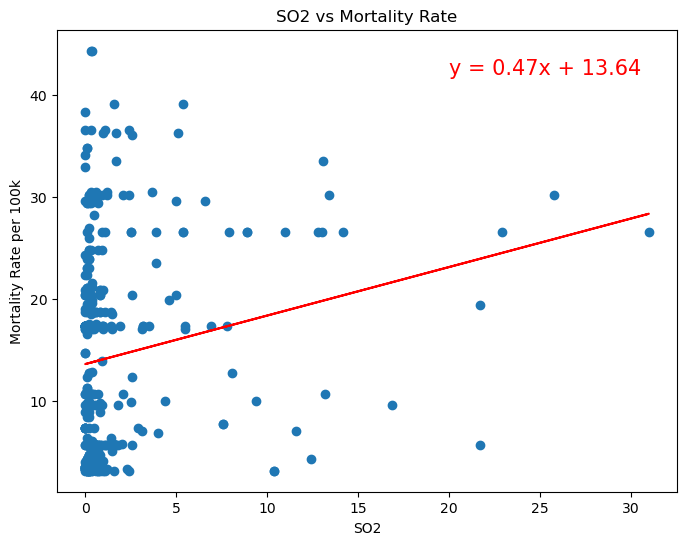

In [20]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_SO2 = data['SO2']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_SO2, y_axis_data)
regress_values = x_axis_data_SO2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_SO2, y_axis_data)
plt.title('SO2 vs Mortality Rate')
plt.xlabel('SO2')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_SO2, regress_values,"r-")
plt.annotate(line_eq,(20,42),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.show()

## NH3

The r-squared is: 0.052776718930470215


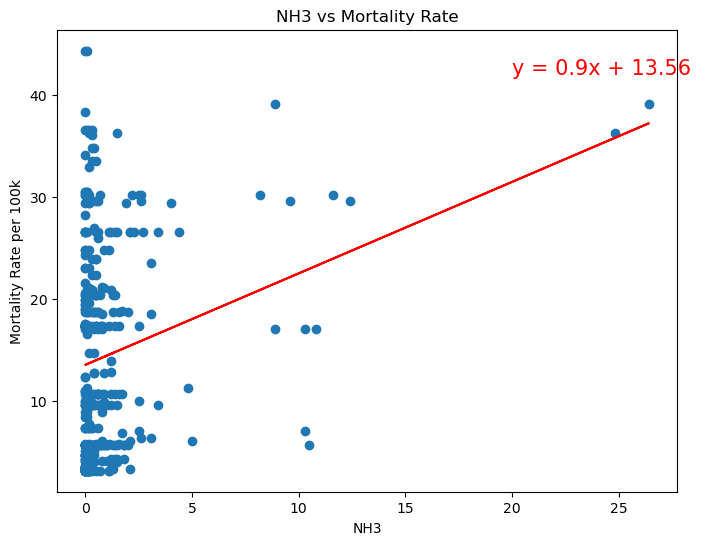

In [21]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_NH3 = data['NH3']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_NH3, y_axis_data)
regress_values = x_axis_data_NH3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_NH3, y_axis_data)
plt.title('NH3 vs Mortality Rate')
plt.xlabel('NH3')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_NH3, regress_values,"r-")
plt.annotate(line_eq,(20,42),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.show()